# ***OLA BUSINESS CASE - ENSEMBLE LEARNING***

## About ***OLA***

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

## **Business Problem**

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like


*   Demographics (city, age, gender etc.)
*   Tenure information (joining date, Last Date)
*   Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)





## **Importing and usage of python libraries for exploration & visualization and Statistics and Probability and Ensemble Techniques**

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
!pip install category_encoders
from category_encoders import TargetEncoder

In [4]:
!gdown 1C7y191GyP6lSsGFaJckVTYpm9qQ0i1TN

Downloading...
From: https://drive.google.com/uc?id=1C7y191GyP6lSsGFaJckVTYpm9qQ0i1TN
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 110MB/s]


In [5]:
df = pd.read_csv("ola_driver_scaler.csv")
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [6]:
df.head(50)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


**Understanding the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


So from the above, we can see that gender, age and last working date has some null values. In case of last working date column this could be due to many employees are still working in the company so this is null which is expected.

### **Data PreProcessing**

Now since this data involves raw data of several employees month wise, it is important that we clean up the data and process it accordingly to use it for modelling.

Deleting the column unnamed

In [8]:
df.drop(columns="Unnamed: 0", axis = 1, inplace=True)

**Handling missing values using KNN imputation for Numerical columns**

In [9]:
df1 = df.drop(['MMM-YY','City','Dateofjoining','LastWorkingDate'], axis = 1)
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df1)
imputed_df = pd.DataFrame(imputed, columns=df1.columns)
df['Age'] = imputed_df['Age']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19104 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


From the above we can see that we have treated the Age columns null value using KNN imputing since they were numerical columns. Now we have only LastworkingDate column with null which is the true data, so using this we will create a new feature post grouping the data at Driver_ID level.

In [11]:
df['Driver_ID'].value_counts()

2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: Driver_ID, Length: 2381, dtype: int64

From the above we can see that we have a total of 2381 unique employees data here.

Grouping the data by Driver_ID

In [12]:
data = df.groupby(by = "Driver_ID").agg({"MMM-YY" :"last",
                                         "Age" : "first",
                                         "Gender" : "first",
                                         "City" : "first",
                                         "Education_Level": "first",
                                         "Income" : "first",
                                         "Dateofjoining" : "first",
                                         "LastWorkingDate" : "last",
                                         "Joining Designation" : "first",
                                         "Grade" : "first",
                                         "Total Business Value" : ["first","last"],
                                         "Quarterly Rating" : ["first","last"]}).reset_index()
data.head()

Driver_ID    MMM-YY   Age Gender  City Education_Level Income Dateofjoining  \
                 last first  first first           first  first         first   
0         1  03/01/19  28.0    0.0   C23               2  57387      24/12/18   
1         2  12/01/20  31.0    0.0    C7               2  67016      11/06/20   
2         4  04/01/20  43.0    0.0   C13               2  65603      12/07/19   
3         5  03/01/19  29.0    0.0    C9               0  46368      01/09/19   
4         6  12/01/20  31.0    1.0   C11               1  78728      31/07/20   

  LastWorkingDate Joining Designation Grade Total Business Value       \
             last               first first                first last   
0        03/11/19                   1     1              2381060    0   
1            None                   2     2                    0    0   
2        27/04/20                   2     2                    0    0   
3        03/07/19                   1     1                    0    0   
4            None                   3     3                    0    0   

  Quarterly Rating       
             first last  
0                2    2  
1                1    1  
2                1    1  
3                1    1  
4                1    2

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Driver_ID, )                  2381 non-null   int64  
 1   (MMM-YY, last)                 2381 non-null   object 
 2   (Age, first)                   2381 non-null   float64
 3   (Gender, first)                2381 non-null   float64
 4   (City, first)                  2381 non-null   object 
 5   (Education_Level, first)       2381 non-null   int64  
 6   (Income, first)                2381 non-null   int64  
 7   (Dateofjoining, first)         2381 non-null   object 
 8   (LastWorkingDate, last)        1616 non-null   object 
 9   (Joining Designation, first)   2381 non-null   int64  
 10  (Grade, first)                 2381 non-null   int64  
 11  (Total Business Value, first)  2381 non-null   int64  
 12  (Total Business Value, last)   2381 non-null   i

In [14]:
column_name = ["Driver_ID","MMM-YY","Age","Gender","City","Education_Level","Income","Dateofjoining","LastWorkingDate","Joining Designation","Grade","Total Business Value first",
               "Total Business Value last", "Quarterly Rating first", "Quarterly Rating last"]
data.columns = column_name
data.head(20)

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value first,Total Business Value last,Quarterly Rating first,Quarterly Rating last
0,1,03/01/19,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,2381060,0,2,2
1,2,12/01/20,31.0,0.0,C7,2,67016,11/06/20,None,2,2,0,0,1,1
2,4,04/01/20,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,0,1,1
3,5,03/01/19,29.0,0.0,C9,0,46368,01/09/19,03/07/19,1,1,0,0,1,1
4,6,12/01/20,31.0,1.0,C11,1,78728,31/07/20,None,3,3,0,0,1,2
5,8,11/01/20,34.0,0.0,C2,0,70656,19/09/20,15/11/20,3,3,0,0,1,1
6,11,12/01/20,28.0,1.0,C19,2,42172,12/07/20,None,1,1,0,0,1,1
7,12,12/01/19,35.0,0.0,C23,2,28116,29/06/19,21/12/19,1,1,500000,0,4,1
8,13,11/01/20,29.0,0.0,C19,2,119227,28/05/15,25/11/20,1,4,250000,0,1,1
9,14,12/01/20,39.0,1.0,C26,0,19734,16/10/20,None,3,3,0,0,1,1


### **Feature Engineering**

In [15]:
data["MMM-YY"] = pd.to_datetime(data["MMM-YY"])
data["Dateofjoining"] = pd.to_datetime(data["Dateofjoining"])
data["LastWorkingDate"] = pd.to_datetime(data["LastWorkingDate"])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   int64         
 1   MMM-YY                      2381 non-null   datetime64[ns]
 2   Age                         2381 non-null   float64       
 3   Gender                      2381 non-null   float64       
 4   City                        2381 non-null   object        
 5   Education_Level             2381 non-null   int64         
 6   Income                      2381 non-null   int64         
 7   Dateofjoining               2381 non-null   datetime64[ns]
 8   LastWorkingDate             1616 non-null   datetime64[ns]
 9   Joining Designation         2381 non-null   int64         
 10  Grade                       2381 non-null   int64         
 11  Total Business Value first  2381 non-null   int64       

In [17]:
data['Age'] = data['Age'].astype(int)

In [18]:
data[data['LastWorkingDate'].notnull()].index

Int64Index([   0,    2,    3,    5,    7,    8,   10,   11,   12,   13,
            ...
            2364, 2367, 2368, 2369, 2371, 2373, 2375, 2377, 2378, 2379],
           dtype='int64', length=1616)

In [19]:
resigned_index = data[data['LastWorkingDate'].notnull()].index
data.loc[resigned_index, 'Resigned'] = 1
not_resigned_index = data[data['LastWorkingDate'].isnull()].index
data.loc[not_resigned_index, 'Resigned'] = 0

In [20]:
data['Resigned'].value_counts(normalize=True)

1.0    0.678706
0.0    0.321294
Name: Resigned, dtype: float64

Now this Resigned column will be our target feature. and we can see that the available data is imbalanced data. So we have to do imbalance treatment before modelling.

In [21]:
data['Quaterly improvement'] = np.where(data['Quarterly Rating first'] < data['Quarterly Rating last'] , 1 , 0)
data['Quaterly improvement']

0       0
1       0
2       0
3       0
4       1
       ..
2376    1
2377    0
2378    0
2379    0
2380    1
Name: Quaterly improvement, Length: 2381, dtype: int64

In [22]:
data['Quaterly improvement'].value_counts()

0    2023
1     358
Name: Quaterly improvement, dtype: int64

In [23]:
data['Salary improvement'] = np.where(data['Total Business Value first'] < data['Total Business Value last'] , 1 , 0)
data['Salary improvement']

0       0
1       0
2       0
3       0
4       0
       ..
2376    0
2377    0
2378    0
2379    0
2380    1
Name: Salary improvement, Length: 2381, dtype: int64

In [24]:
data['Salary improvement'].value_counts()

0    1856
1     525
Name: Salary improvement, dtype: int64

In [25]:
data['DOJ_month'] = data['Dateofjoining'].dt.month_name()
data['DOJ_year'] = data['Dateofjoining'].dt.year

In [26]:
data[['DOJ_month','DOJ_year']].head()

,DOJ_month,DOJ_year
0,December,2018
1,November,2020
2,December,2019
3,January,2019
4,July,2020


Now that we have created the new features we can delete the old features which are not required.

In [27]:
data.drop(['Dateofjoining','LastWorkingDate', 'MMM-YY','Quarterly Rating first', 'Quarterly Rating last','Total Business Value first','Total Business Value last', 'Driver_ID'], axis = 1, inplace = True)

In [28]:
data.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Resigned,Quaterly improvement,Salary improvement,DOJ_month,DOJ_year
0,28,0.0,C23,2,57387,1,1,1.0,0,0,December,2018
1,31,0.0,C7,2,67016,2,2,0.0,0,0,November,2020
2,43,0.0,C13,2,65603,2,2,1.0,0,0,December,2019
3,29,0.0,C9,0,46368,1,1,1.0,0,0,January,2019
4,31,1.0,C11,1,78728,3,3,0.0,1,0,July,2020


Now the above will be our final dataset. Which we can use for data exploration

## **Exploratory Data Analysis**

### **Univariate Analysis**

**Gender**

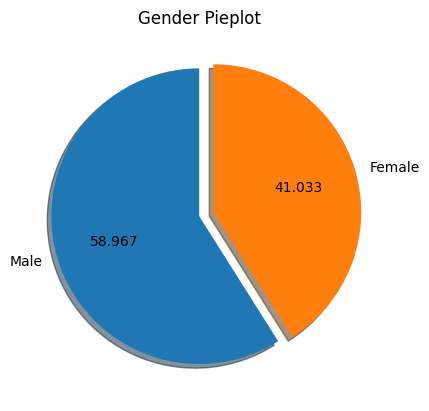

In [29]:
Gender = data['Gender'].value_counts()
plt.pie(Gender, labels = ['Male','Female'], autopct="%.3f", explode = [0,0.1], shadow = True, startangle = 90)
plt.title("Gender Pieplot")
plt.show()

From the above pieplot for Gender, we can understand that the Male drivers are more than female drivers.

**Age**

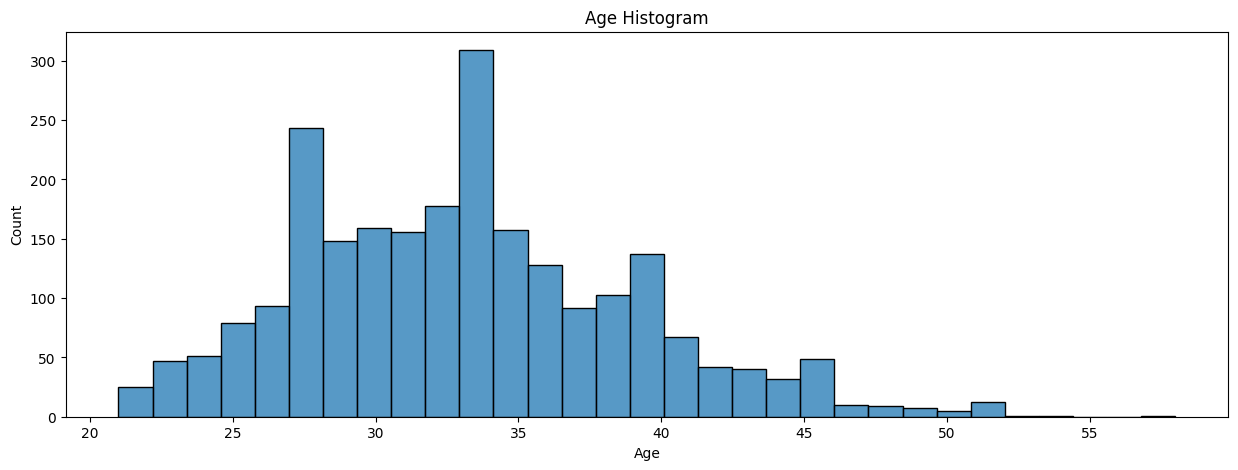

In [30]:
plt.figure(figsize = (15,5))
sns.histplot(data = data, x = 'Age')
plt.title("Age Histogram")
plt.show()

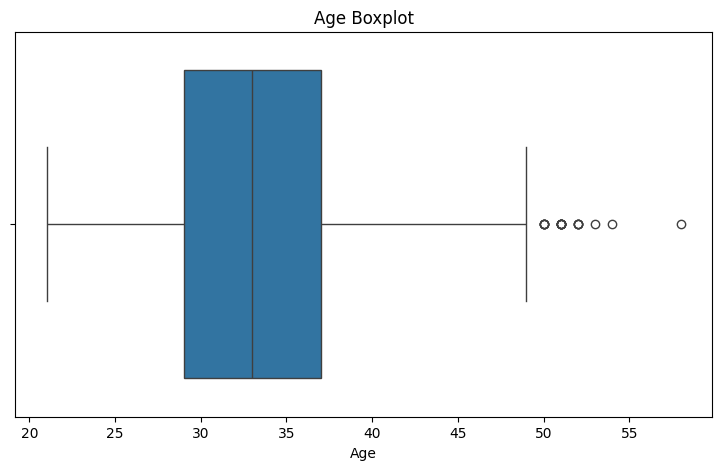

In [31]:
plt.figure(figsize = (9,5))
sns.boxplot(data = data, x = 'Age')
plt.title("Age Boxplot")
plt.show()

From the above two plots we can see that around 50 percnetage of the drivers are aged from 29 to 37 years. We could also see some outliers above 50 years of age.

**City**

<ipython-input-32-558b443a997e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'City', palette = "cool")


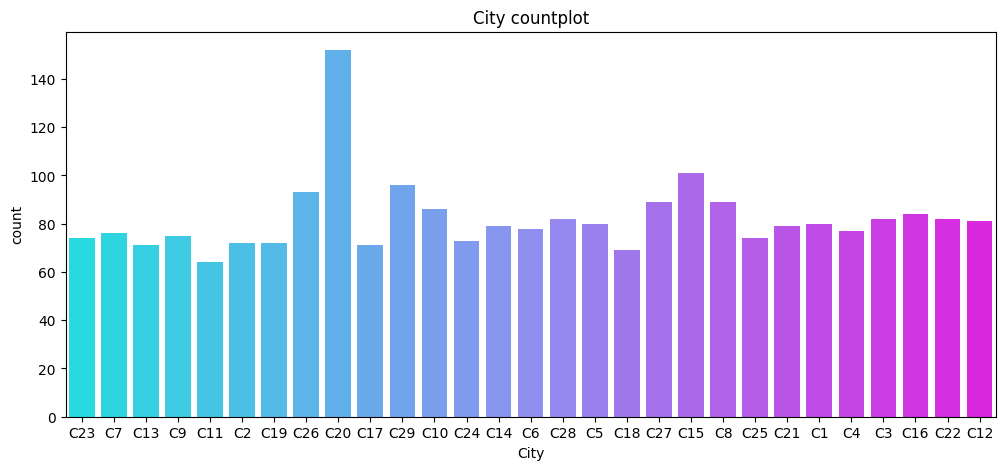

In [32]:
plt.figure(figsize = (12,5))
sns.countplot(data = data, x = 'City', palette = "cool")
plt.title("City countplot")
plt.show()

From the above plot we can see that city C20 has the highest number of drivers followed by C15, C29. And the least number of drivers are in C11 and C18 cities.

**Education Level**

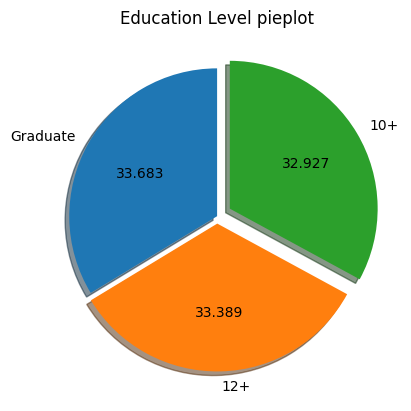

In [33]:
education = data['Education_Level'].value_counts()
plt.pie(education, labels = ['Graduate', '12+', '10+'], autopct = "%.3f", explode = [0,0.05,0.1], shadow = True, startangle= 90)
plt.title("Education Level pieplot")
plt.show()

From the above pieplot we can see that most number of drivers are graduates but the difference between them and people with 12 and 10 completed are very less.

**Income**

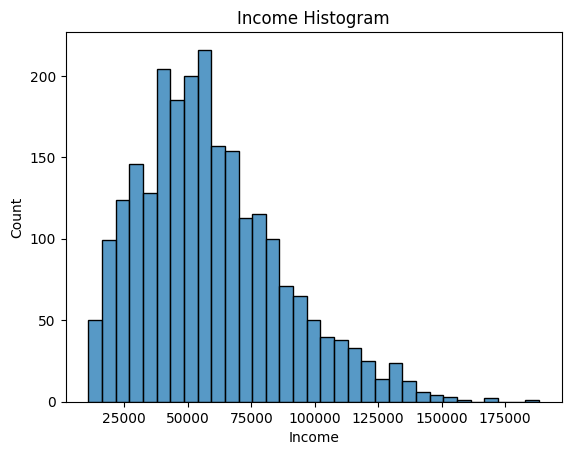

In [34]:
sns.histplot(data = data, x = 'Income')
plt.title("Income Histogram")
plt.show()

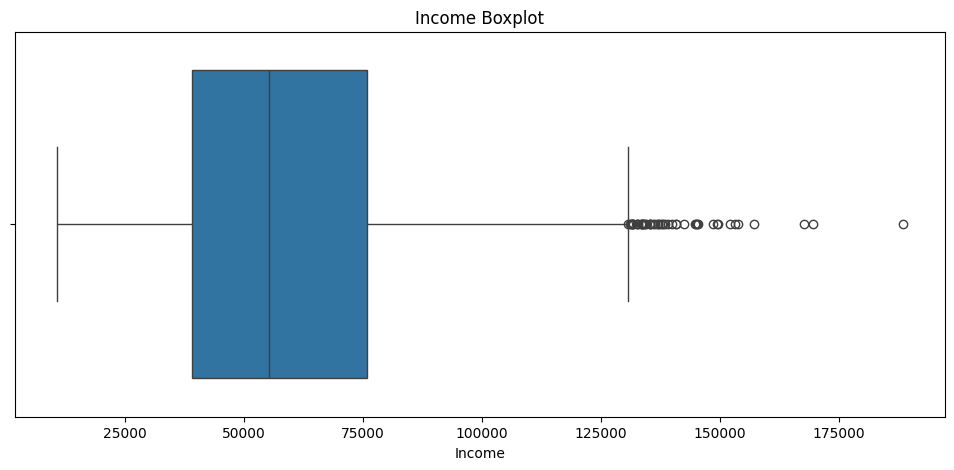

In [35]:
plt.figure(figsize = (12,5))
sns.boxplot(data = data, x = 'Income')
plt.title("Income Boxplot")
plt.show()

From the above plots we can see that almost 50% of drivers has an income of Rs.40k to 75k monthly. But we could also see some outliers who earns above Rs.130k to 200k every month.

**Joining Designation**

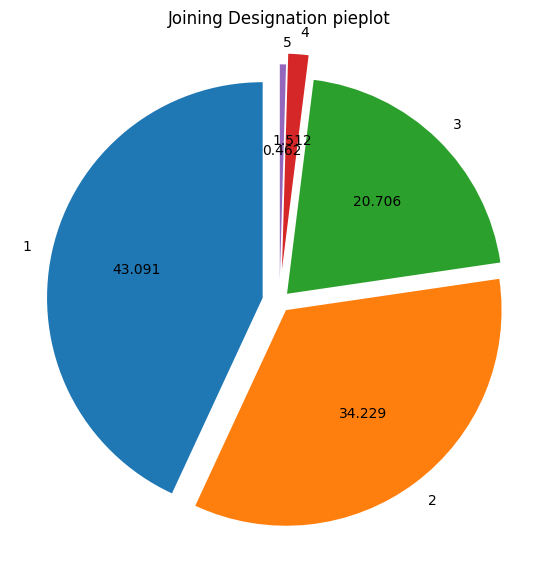

In [36]:
designation = data['Joining Designation'].value_counts()
plt.figure(figsize = (7,7))
plt.pie(designation, labels = designation.index , autopct = "%.3f", explode = [0.08,0.05,0.05,0.15,0.1], startangle= 90)
plt.title("Joining Designation pieplot")
plt.show()

From the above pieplot we can understand that most drivers has a designation as 1 when joining with around 43% and the least offered designation is 5 with less than 1%.

**Grade**

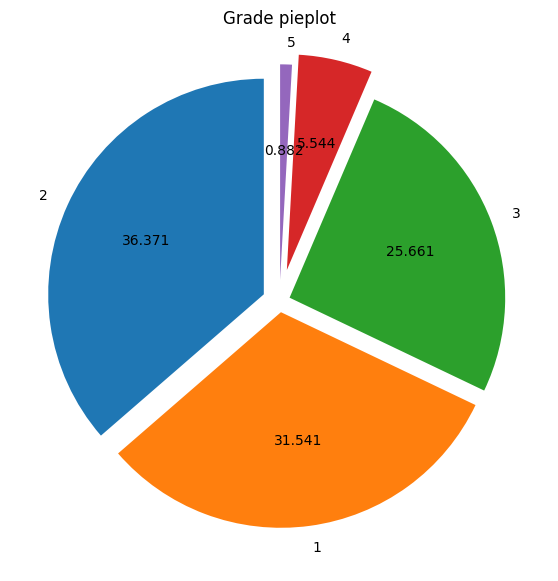

In [37]:
grade = data['Grade'].value_counts()
plt.figure(figsize = (7,7))
plt.pie(grade, labels = grade.index , autopct = "%.3f", explode = [0.08,0.05,0.05,0.15,0.1], startangle= 90)
plt.title("Grade pieplot")
plt.show()

From the above Grade pieplot we can see that Grade 2 drivers are the majority with 36%, followed by Grade 1 drivers with 31%. Grade 5 drivers are the least with less than 1 percent.

**Resigned**

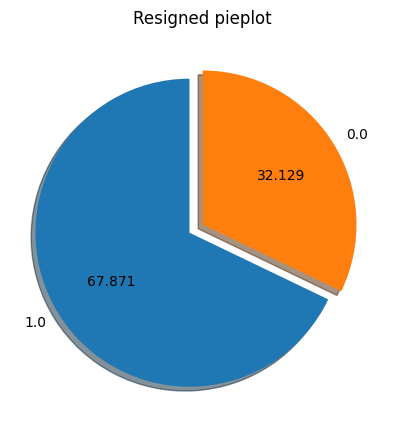

In [38]:
resigned = data['Resigned'].value_counts()
plt.figure(figsize = (5,5))
plt.pie(resigned, labels = resigned.index , autopct = "%.3f",shadow = True, explode = [0.1,0], startangle= 90)
plt.title("Resigned pieplot")
plt.show()

From the above pieplot for resigned we can see that over 67% of the drivers have resigned and 32% drivers are still working.

**Date of Joining Year**

<ipython-input-39-deb2a88a6398>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'DOJ_year', palette = 'GnBu_r')


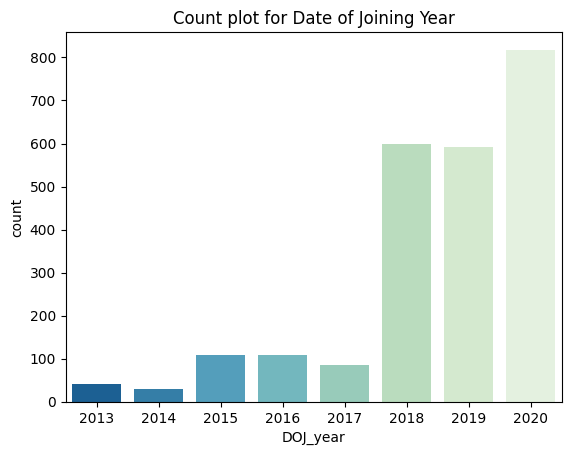

In [39]:
sns.countplot(data = data, x = 'DOJ_year', palette = 'GnBu_r')
plt.title("Count plot for Date of Joining Year")
plt.show()

We can see that year 2020 was the year this company has seen most numbers of drivers joining, wherease 2013 and 2014 are years with least joining.

**Date of Joining Month**

<ipython-input-40-ce47879f4476>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'DOJ_month', palette = 'autumn')


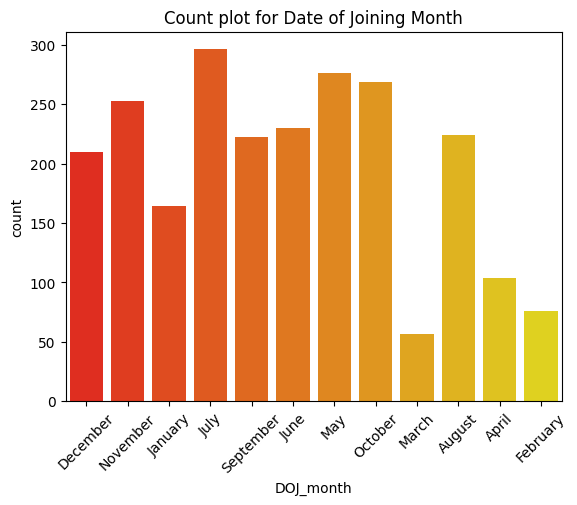

In [40]:
sns.countplot(data = data, x = 'DOJ_month', palette = 'autumn')
plt.title("Count plot for Date of Joining Month")
plt.xticks(rotation = 45)
plt.show()

From the above countplot we can see that months July, May, October has the highest numbers of joining. Wherease March, April, February has the least number of joiners.

### **Bi-Variate Analysis**

**Age vs Resigned**

<ipython-input-41-d413f432cab7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x = 'Resigned', y = 'Age', palette='cool')


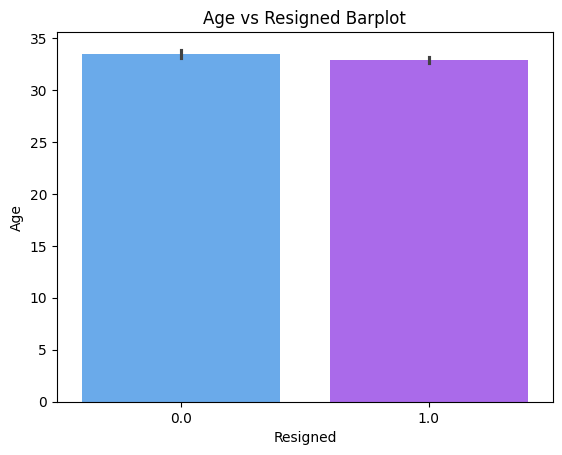

In [41]:
sns.barplot(data = data, x = 'Resigned', y = 'Age', palette='cool')
plt.title("Age vs Resigned Barplot")
plt.show()

From the above Barplot for Resigned vs Age we can see that people who have resigned and not resigned almost have the same average age.

**Gender vs Resigned**

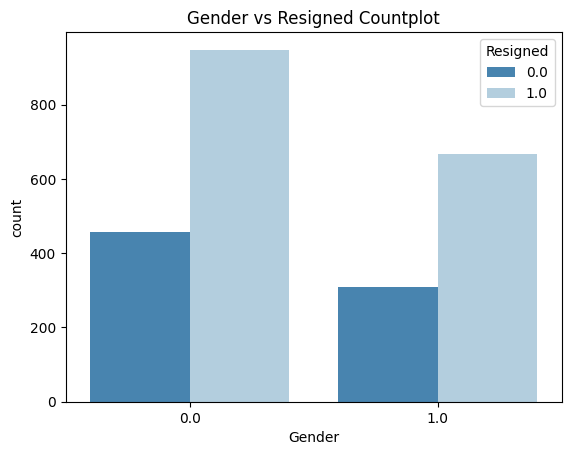

In [42]:
sns.countplot(data = data, x = 'Gender', hue = 'Resigned', palette = 'Blues_r')
plt.title("Gender vs Resigned Countplot")
plt.show()

Above countplot of Gender vs Resigned shows that the attrition is high among Males compared to that of Females.

**Education vs Resigned**

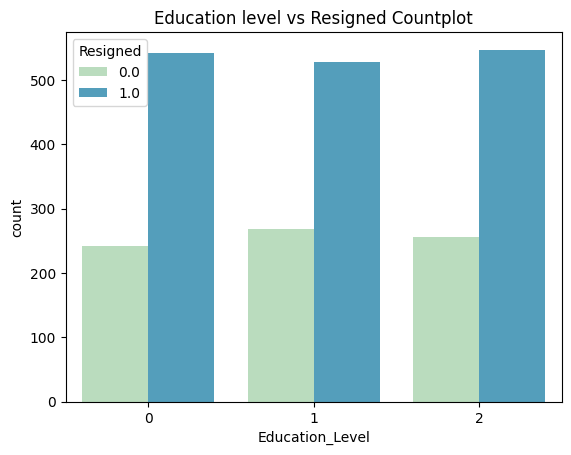

In [43]:
sns.countplot(data = data, x = 'Education_Level', hue = 'Resigned', palette = 'GnBu')
plt.title("Education level vs Resigned Countplot")
plt.show()

From the above plot we can see that Education level as Graduate has the highest resigns compared to that of other two groups of education. Whereas people who completed 12th class tend to stay in the company more than graduates and people who have education upto 10th class.

**City vs Resigned**

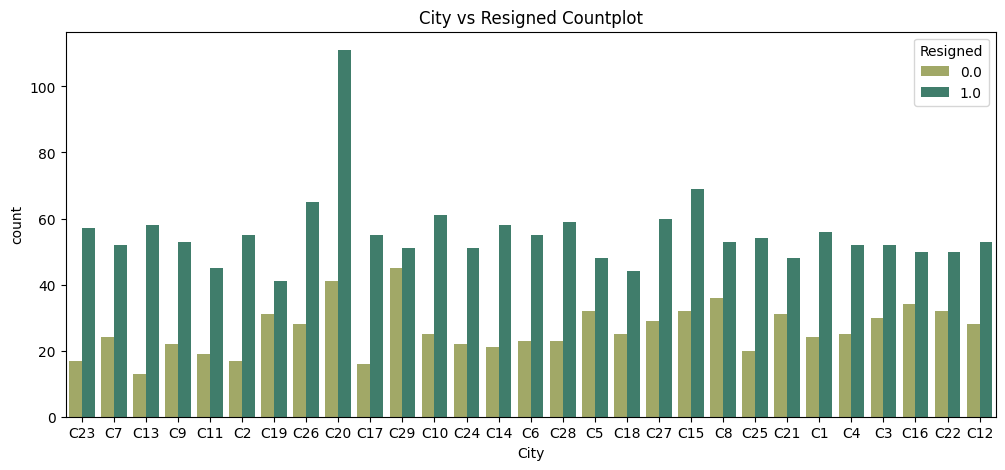

In [44]:
plt.figure(figsize = (12,5))
sns.countplot(data = data, x = 'City', hue = 'Resigned', palette = 'gist_earth_r')
plt.title("City vs Resigned Countplot")
plt.show()

Cities C20 and C15 has the highest numbers of attrition, whereas C19 and C18 has the lowest attrition. City C29 has the least resignations compared to the total number of drivers.

**Grade vs Resigned**

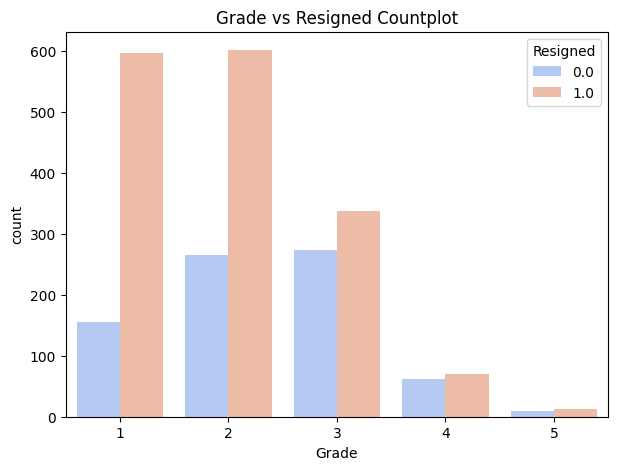

In [45]:
plt.figure(figsize = (7,5))
sns.countplot(data = data, x = 'Grade', hue = 'Resigned', palette = 'coolwarm')
plt.title("Grade vs Resigned Countplot")
plt.show()

The attrition among grade 1 people is the highest and the grade 3 drivers has the lowest attrition. This suggests higher the grade lower the attrition.

**Income vs Resigned**

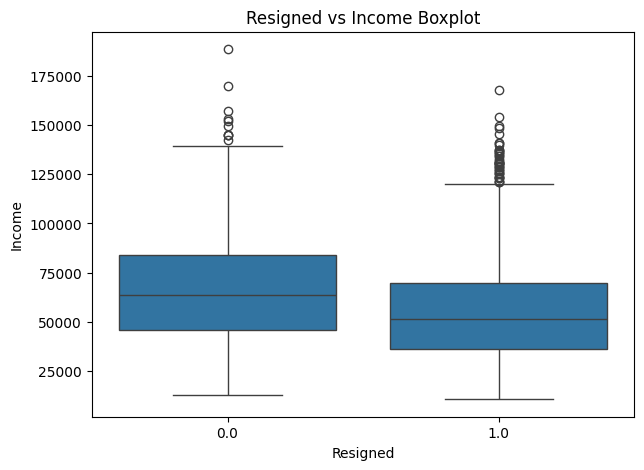

In [46]:
plt.figure(figsize = (7,5))
sns.boxplot(data = data, x = 'Resigned', y = 'Income')
plt.title("Resigned vs Income Boxplot")
plt.show()

The above Boxplot shows that the average income of people who continued to work here is more than people who left the company. People who stayed has an income range of 45k to 80k for 50% of the drivers. Whereas the income of drivers who left had a significantly less range starting from 35k to 70k for 50% of the drivers. We can also see some outliers in both the cases with people staying having significantly higher outliers.

### **Multivariate Analysis**

**HeatMap**

<ipython-input-47-6a508984f533>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True,cmap = "YlGnBu")


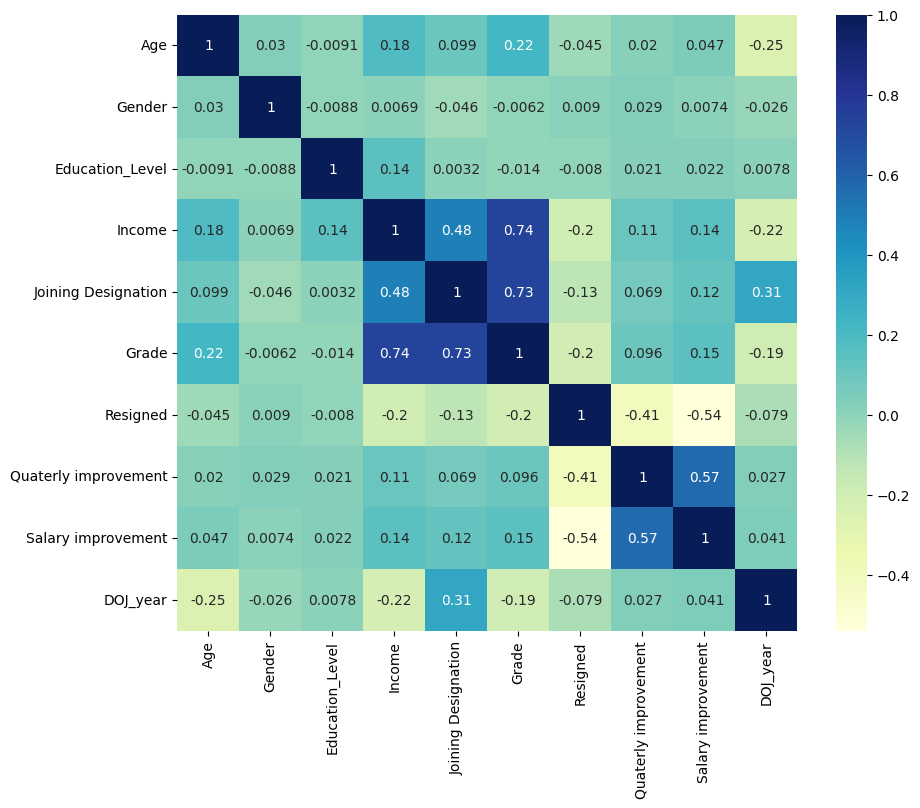

In [47]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True,cmap = "YlGnBu")
plt.show()

From the above pair plot we can see that Income and Grade is having a good correlation and Grade and Joining designation has a good correlation.

In [48]:
data.drop(['DOJ_month', 'DOJ_year'], axis = 1, inplace = True)

### **One Hot encoding of Categorical features**

In [49]:
data_enc = pd.get_dummies(data, columns = ['Education_Level', 'Grade'])
data_enc.head()

,Age,Gender,City,Income,Joining Designation,Resigned,Quaterly improvement,Salary improvement,Education_Level_0,Education_Level_1,Education_Level_2,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5
0,28,0.0,C23,57387,1,1.0,0,0,0,0,1,1,0,0,0,0
1,31,0.0,C7,67016,2,0.0,0,0,0,0,1,0,1,0,0,0
2,43,0.0,C13,65603,2,1.0,0,0,0,0,1,0,1,0,0,0
3,29,0.0,C9,46368,1,1.0,0,0,1,0,0,1,0,0,0,0
4,31,1.0,C11,78728,3,0.0,1,0,0,1,0,0,0,1,0,0


Now we have encoded two of the Categorical features Education level and Grades. Its suggested that we dont do the one hot encoding with large number of categories as this will increase the dimensionality, complex and makes the learning slower.

## **ML classifier modelling**

### **Train Test split**

In [50]:
X = data_enc.drop('Resigned', axis = 1)
y = data_enc['Resigned']

In [51]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=10, test_size= 0.2)

In [52]:
Xtrain.head()

,Age,Gender,City,Income,Joining Designation,Quaterly improvement,Salary improvement,Education_Level_0,Education_Level_1,Education_Level_2,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5
37,49,1.0,C5,89367,3,0,0,1,0,0,0,0,1,0,0
2368,36,0.0,C19,35607,1,0,0,1,0,0,1,0,0,0,0
2319,31,1.0,C29,38744,1,1,1,0,1,0,1,0,0,0,0
85,30,1.0,C23,60332,2,1,1,0,1,0,0,1,0,0,0
1166,33,0.0,C26,47651,2,0,0,0,0,1,0,1,0,0,0


In [53]:
target = TargetEncoder()
target_encode_categories = ['Gender', 'City', 'Joining Designation', 'Quaterly improvement' ,'Salary improvement']
target_encoded = pd.DataFrame(target.fit_transform(Xtrain[target_encode_categories],ytrain), columns = target_encode_categories, index = Xtrain.index)

In [54]:
Xtrain[target_encode_categories] = target_encoded[target_encode_categories]
Xtrain.head()

,Age,Gender,City,Income,Joining Designation,Quaterly improvement,Salary improvement,Education_Level_0,Education_Level_1,Education_Level_2,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5
37,49,1.0,0.646545,89367,3,0,0,1,0,0,0,0,1,0,0
2368,36,0.0,0.574362,35607,1,0,0,1,0,0,1,0,0,0,0
2319,31,1.0,0.553107,38744,1,1,1,0,1,0,1,0,0,0,0
85,30,1.0,0.764607,60332,2,1,1,0,1,0,0,1,0,0,0
1166,33,0.0,0.675017,47651,2,0,0,0,0,1,0,1,0,0,0


In [55]:
ytrain.head()

37      1.0
2368    1.0
2319    1.0
85      0.0
1166    1.0
Name: Resigned, dtype: float64

In [57]:
target = TargetEncoder()
target_encode_categories = ['Gender', 'City', 'Joining Designation', 'Quaterly improvement' ,'Salary improvement']
target_encoded = pd.DataFrame(target.fit_transform(Xtest[target_encode_categories],ytest), columns = target_encode_categories, index = Xtest.index)

In [58]:
Xtest[target_encode_categories] = target_encoded[target_encode_categories]
Xtest.head()

,Age,Gender,City,Income,Joining Designation,Quaterly improvement,Salary improvement,Education_Level_0,Education_Level_1,Education_Level_2,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5
539,23,1.0,0.558333,57931,1,0,0,0,1,0,1,0,0,0,0
216,29,0.0,0.641668,47864,1,0,0,0,1,0,1,0,0,0,0
1209,30,1.0,0.641668,58946,2,0,1,0,0,1,0,1,0,0,0
2232,31,0.0,0.691666,81792,2,0,0,0,0,1,0,1,0,0,0
798,34,1.0,0.744173,70330,3,0,0,0,0,1,0,0,1,0,0


In [59]:
ytest.head()

539     1.0
216     1.0
1209    1.0
2232    1.0
798     1.0
Name: Resigned, dtype: float64

### **Standardization**

In [60]:
scaler = StandardScaler()
Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain), columns = Xtrain.columns)
Xtest = pd.DataFrame(scaler.transform(Xtest), columns = Xtest.columns)

In [61]:
Xtrain.head()

,Age,Gender,City,Income,Joining Designation,Quaterly improvement,Salary improvement,Education_Level_0,Education_Level_1,Education_Level_2,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5
0,2.737159,1.179813,-0.549231,1.060384,1.404607,-0.413487,-0.526303,1.449475,-0.709894,-0.721642,-0.680801,-0.758192,1.722401,-0.245222,-0.097693
1,0.509268,-0.847592,-1.683103,-0.835464,-0.973670,-0.413487,-0.526303,1.449475,-0.709894,-0.721642,1.468859,-0.758192,-0.580585,-0.245222,-0.097693
2,-0.347613,1.179813,-2.016983,-0.724837,-0.973670,2.418454,1.900045,-0.689905,1.408661,-0.721642,1.468859,-0.758192,-0.580585,-0.245222,-0.097693
3,-0.518989,1.179813,1.305345,0.036464,0.215469,2.418454,1.900045,-0.689905,1.408661,-0.721642,-0.680801,1.318927,-0.580585,-0.245222,-0.097693
4,-0.004860,-0.847592,-0.101982,-0.410732,0.215469,-0.413487,-0.526303,-0.689905,-0.709894,1.385729,-0.680801,1.318927,-0.580585,-0.245222,-0.097693


In [62]:
Xtest.head()

,Age,Gender,City,Income,Joining Designation,Quaterly improvement,Salary improvement,Education_Level_0,Education_Level_1,Education_Level_2,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5
0,23.0,1.000000e+00,0.558333,57931.0,1.0,1.231508e-16,1.772625e-17,-9.329605e-18,1.000000e+00,-4.011730e-17,1.000000e+00,-6.810612e-17,-5.597763e-17,-4.011730e-17,4.571507e-17
1,29.0,1.021592e-16,0.641668,47864.0,1.0,1.231508e-16,1.772625e-17,-9.329605e-18,1.000000e+00,-4.011730e-17,1.000000e+00,-6.810612e-17,-5.597763e-17,-4.011730e-17,4.571507e-17
2,30.0,1.000000e+00,0.641668,58946.0,2.0,1.231508e-16,1.000000e+00,-9.329605e-18,-8.583237e-17,1.000000e+00,9.329605e-19,1.000000e+00,-5.597763e-17,-4.011730e-17,4.571507e-17
3,31.0,1.021592e-16,0.691666,81792.0,2.0,1.231508e-16,1.772625e-17,-9.329605e-18,-8.583237e-17,1.000000e+00,9.329605e-19,1.000000e+00,-5.597763e-17,-4.011730e-17,4.571507e-17
4,34.0,1.000000e+00,0.744173,70330.0,3.0,1.231508e-16,1.772625e-17,-9.329605e-18,-8.583237e-17,1.000000e+00,9.329605e-19,-6.810612e-17,1.000000e+00,-4.011730e-17,4.571507e-17


**Using Decision Tree as basic model**

In [63]:
kfold = KFold(n_splits=10)
depths = [3,4,5,6,7,8,9,10,11,13,15]
for depth in depths:
  Dt_Cls = DecisionTreeClassifier(random_state=7,max_depth=depth)
  cv_acc_results = cross_validate(Dt_Cls, Xtrain, ytrain, cv = kfold, scoring = "accuracy", return_train_score=True)

  print(f"K-Fold for depth: {depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
  print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
  print('***************')

K-Fold for depth: 3 Accuracy Mean: Train: 81.2325234785677 Validation: 80.62248553320475
K-Fold for depth: 3 Accuracy Std: Train: 0.22063464027123691 Validation: 1.9720920212556132
***************
K-Fold for depth: 4 Accuracy Mean: Train: 82.00866324578129 Validation: 80.2014329016258
K-Fold for depth: 4 Accuracy Std: Train: 0.22988047833289132 Validation: 1.654660290289185
***************
K-Fold for depth: 5 Accuracy Mean: Train: 82.83735944704543 Validation: 79.83466519702398
K-Fold for depth: 5 Accuracy Std: Train: 0.2768195617698881 Validation: 1.9363584728867926
***************
K-Fold for depth: 6 Accuracy Mean: Train: 83.92864368229498 Validation: 79.36318545053733
K-Fold for depth: 6 Accuracy Std: Train: 0.405008031722135 Validation: 2.6028753041479886
***************
K-Fold for depth: 7 Accuracy Mean: Train: 85.21252131241566 Validation: 77.89335905208047
K-Fold for depth: 7 Accuracy Std: Train: 0.5179228790661438 Validation: 2.7137509286812267
***************
K-Fold for depth:

From the above we can understand that max depth of 3 is having the best performance and accuracy. so lets see the confusion matrix for this model

**Without Class balance**

In [64]:
Dt_best = DecisionTreeClassifier(max_depth=3)
Dt_best.fit(Xtrain,ytrain)
pred_1 = Dt_best.predict(Xtest)

In [65]:
print("Accuracy: " , accuracy_score(ytest, Dt_best.predict(Xtest)))
print("Recall: " , recall_score(ytest, Dt_best.predict(Xtest)))
print("Precision: " , precision_score(ytest, Dt_best.predict(Xtest)))
print("ROC AUC score: " , roc_auc_score(ytest, Dt_best.predict(Xtest)))
print("f1 score: " , f1_score(ytest, Dt_best.predict(Xtest)))

Accuracy:  0.7966457023060797
Recall:  0.9213836477987422
Precision:  0.8027397260273973
ROC AUC score:  0.7342767295597485
f1 score:  0.8579795021961933


Above we can see the metrics of the decision tree classfier but since the data is imbalance as of now we cannot rely on these score. Also there is scope for improvement in this score.

Text(0.5, 23.52222222222222, 'Predicted label')

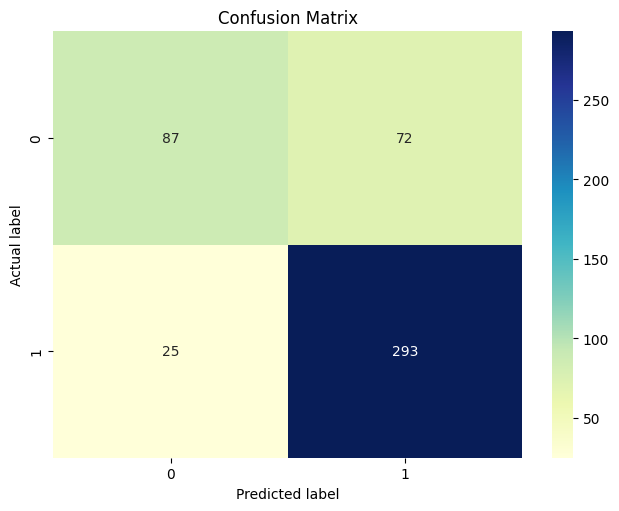

In [66]:
cnf_matix = confusion_matrix(ytest, pred_1)
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matix), annot = True, cmap = 'YlGnBu',fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

From the above confusion matrix we can see that the false negatives and false positives are very high, so we need to reduce them by improvizing the model.

### **Class Imbalance Treatment**

**Using Class weight for class balancing**

In [67]:
Dt_best_2 = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
Dt_best_2.fit(Xtrain,ytrain)
pred_2 = Dt_best.predict(Xtest)

In [68]:
print("Accuracy: " , accuracy_score(ytest, pred_2))
print("Recall: " , recall_score(ytest, pred_2))
print("Precision: " , precision_score(ytest, pred_2))
print("ROC AUC score: " , roc_auc_score(ytest, pred_2))
print("f1 score: " , f1_score(ytest, pred_2))

Accuracy:  0.7966457023060797
Recall:  0.9213836477987422
Precision:  0.8027397260273973
ROC AUC score:  0.7342767295597485
f1 score:  0.8579795021961933


Text(0.5, 23.52222222222222, 'Predicted label')

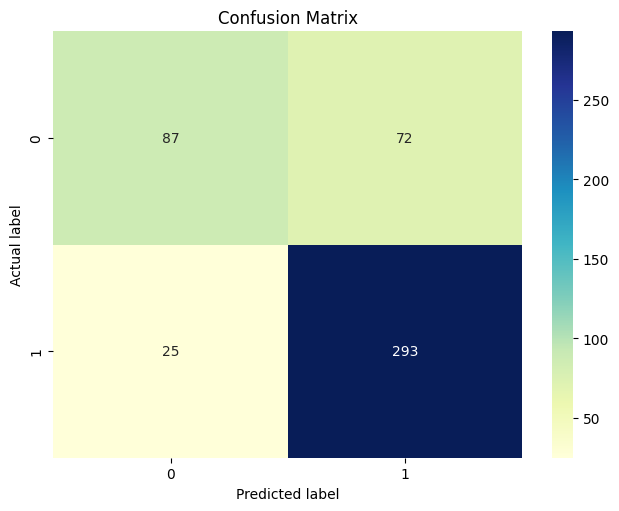

In [69]:
cnf_matix = confusion_matrix(ytest, pred_1)
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matix), annot = True, cmap = 'YlGnBu',fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Using SMOTE for class balancing**

In [70]:
smote = SMOTE(random_state = 0)
X_smote, y_smote = smote.fit_resample(Xtrain, ytrain)

In [71]:
Dt_best_3 = DecisionTreeClassifier(max_depth=3)
Dt_best_3.fit(X_smote,y_smote)
pred_3 = Dt_best.predict(Xtest)

In [72]:
print("Accuracy: " , accuracy_score(ytest, pred_3))
print("Recall: " , recall_score(ytest, pred_3))
print("Precision: " , precision_score(ytest, pred_3))
print("ROC AUC score: " , roc_auc_score(ytest, pred_3))
print("f1 score: " , f1_score(ytest, pred_3))

Accuracy:  0.7966457023060797
Recall:  0.9213836477987422
Precision:  0.8027397260273973
ROC AUC score:  0.7342767295597485
f1 score:  0.8579795021961933


Text(0.5, 23.52222222222222, 'Predicted label')

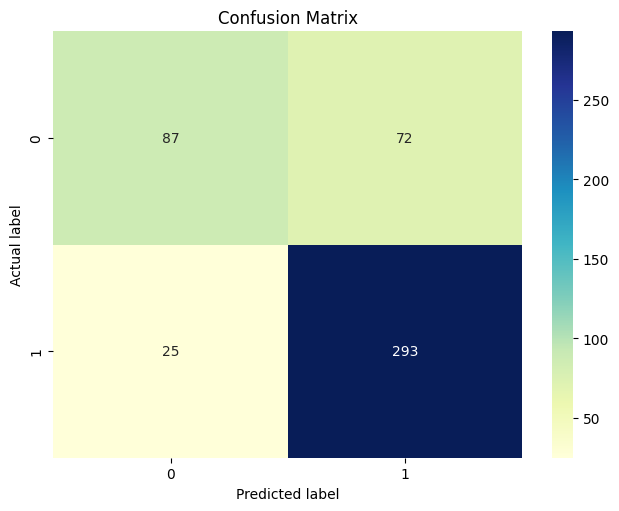

In [73]:
cnf_matix = confusion_matrix(ytest, pred_1)
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matix), annot = True, cmap = 'YlGnBu',fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

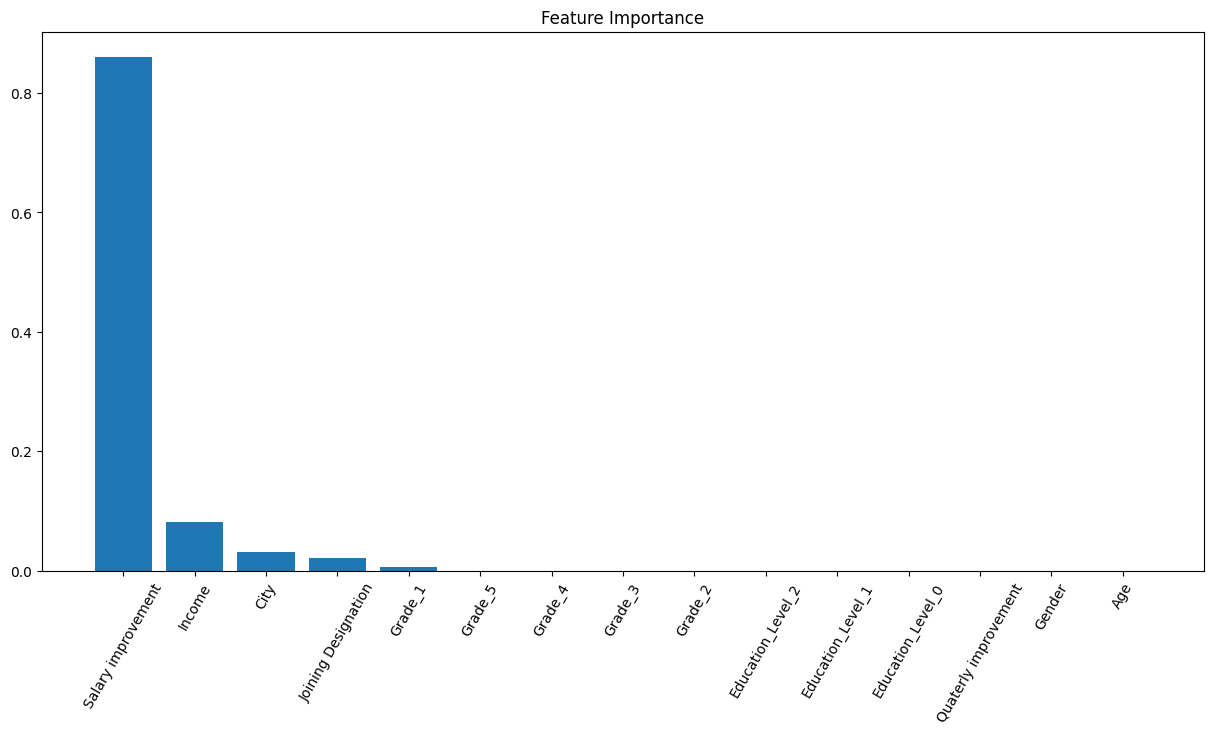

In [76]:
importance = Dt_best_3.feature_importances_
indices = np.argsort(importance)[::-1]
names = [Xtrain.columns[i] for i in indices]

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(Xtrain.shape[1]), importance[indices]) # Add bars
plt.xticks(range(Xtrain.shape[1]), names, rotation=60) # Add feature names as x-axis labels
plt.show() # Show plot

From the above models we got almost the same scores in all the cases. So now lets use Bagging and Boosting algorithms to improve the models further. Also if we look at the features we can see that the additional features which we create using encoding doesnt have any importance. Salary improvement and Income plays the major role in the classification.

Since lot of these features are making the model more complicated and might overfitted the model, we will remove the features that are not at all contributing.

In [110]:
Xtrain = Xtrain[['Salary improvement', 'Income', 'City','Joining Designation', 'Grade_1']]
Xtest = Xtest[['Salary improvement', 'Income', 'City','Joining Designation', 'Grade_1']]

In [111]:
Xtrain.head()

,Salary improvement,Income,City,Joining Designation,Grade_1
0,-0.526303,1.060384,-0.549231,1.404607,-0.680801
1,-0.526303,-0.835464,-1.683103,-0.973670,1.468859
2,1.900045,-0.724837,-2.016983,-0.973670,1.468859
3,1.900045,0.036464,1.305345,0.215469,-0.680801
4,-0.526303,-0.410732,-0.101982,0.215469,-0.680801


In [112]:
Xtest.head()

,Salary improvement,Income,City,Joining Designation,Grade_1
0,1.772625e-17,57931.0,0.558333,1.0,1.000000e+00
1,1.772625e-17,47864.0,0.641668,1.0,1.000000e+00
2,1.000000e+00,58946.0,0.641668,2.0,9.329605e-19
3,1.772625e-17,81792.0,0.691666,2.0,9.329605e-19
4,1.772625e-17,70330.0,0.744173,3.0,9.329605e-19


### **Bagging - Random Forest**

In [113]:
rf_clf = RandomForestClassifier(random_state=7, max_depth=3, n_estimators=100)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, Xtrain, ytrain, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 81.14 
 Validation: 81.15


lets perform grid search CV for hyperparameter tuning

**Grid search CV**

In [93]:
params = {
    'n_estimators' : [7,9,15,20],
    'max_depth' : [3,4,5,6],
    'criterion' : ['gini','entropy'],
    'max_features' : [3,4,5],
    'bootstrap' : [True,False]
    }

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [114]:
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6], 'max_features': [3, 4, 5],
                         'n_estimators': [7, 9, 15, 20]},
             scoring='accuracy')

In [118]:
print(f"Best params:  {grid.best_params_}")
print(f"Best score:  {grid.best_score_*100:.2f}")

Best params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'n_estimators': 15}
Best score:  81.20


In [119]:
rf_clf_best = RandomForestClassifier(random_state=7, max_depth=3, n_estimators=7, criterion = "gini", max_features = 3, bootstrap = True, class_weight='balanced')
rf_clf_best.fit(Xtrain, ytrain)
rf_pred = rf_clf_best.predict(Xtest)

In [120]:
print("Accuracy: " , accuracy_score(ytest, rf_pred))
print("Recall: " , recall_score(ytest, rf_pred))
print("Precision: " , precision_score(ytest, rf_pred))
print("ROC AUC score: " , roc_auc_score(ytest, rf_pred))
print("f1 score: " , f1_score(ytest, rf_pred))

Accuracy:  0.7966457023060797
Recall:  0.9213836477987422
Precision:  0.8027397260273973
ROC AUC score:  0.7342767295597485
f1 score:  0.8579795021961933


Text(0.5, 23.52222222222222, 'Predicted label')

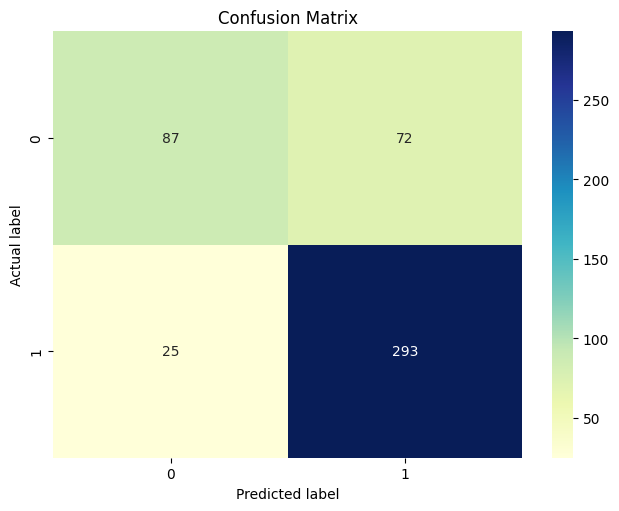

In [121]:
cnf_matix = confusion_matrix(ytest, rf_pred)
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matix), annot = True, cmap = 'YlGnBu',fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

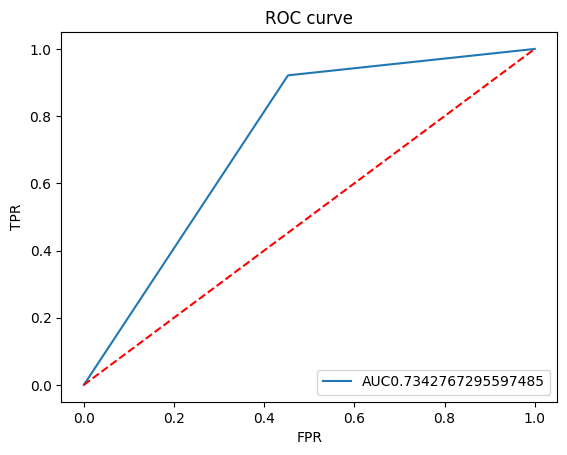

In [143]:
fpr, tpr, _ = roc_curve(ytest, rf_pred)
auc = roc_auc_score(ytest, rf_pred)
plt.plot(fpr, tpr, label = "AUC"+str(auc))
plt.plot([0,1],[0,1], 'r--')
plt.legend(loc = 4)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

From the above model which we created using Random forest we have got a very good scores. Also the ROC curve shows that this is a best model.

Accuracy:  0.7966457023060797

Recall:  0.9213836477987422

Precision:  0.8027397260273973

ROC AUC score:  0.7342767295597485

f1 score:  0.8579795021961933

### **Boosting - Gradient Boosted Decision Tree(GBDT)**

In [131]:
gbdt_clf = GradientBoostingClassifier(random_state=7, max_depth=3, n_estimators=100)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, Xtrain, ytrain, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 81.14 
 Validation: 81.15


lets perform grid search CV for hyperparameter tuning

**Grid Search CV**

In [135]:
params = {
    'n_estimators' : [9,13,15,17,20],
    'max_depth' : [3,4,5],
    'max_features' : [3,4,5]
    }

grid = GridSearchCV(estimator = GradientBoostingClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=3
                    )

In [136]:
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [3, 4, 5],
                         'n_estimators': [9, 13, 15, 17, 20]},
             scoring='accuracy')

In [137]:
print(f"Best params:  {grid.best_params_}")
print(f"Best score:  {grid.best_score_*100:.2f}")

Best params:  {'max_depth': 4, 'max_features': 4, 'n_estimators': 17}
Best score:  81.04


In [139]:
gbdt_clf_best = GradientBoostingClassifier(random_state=7, max_depth=3, n_estimators=17,  max_features = 4)
gbdt_clf_best.fit(Xtrain, ytrain)
gbdt_pred = gbdt_clf_best.predict(Xtest)

In [140]:
print("Accuracy: " , accuracy_score(ytest, gbdt_pred))
print("Recall: " , recall_score(ytest, gbdt_pred))
print("Precision: " , precision_score(ytest, gbdt_pred))
print("ROC AUC score: " , roc_auc_score(ytest, gbdt_pred))
print("f1 score: " , f1_score(ytest, gbdt_pred))

Accuracy:  0.7966457023060797
Recall:  0.9213836477987422
Precision:  0.8027397260273973
ROC AUC score:  0.7342767295597485
f1 score:  0.8579795021961933


Text(0.5, 23.52222222222222, 'Predicted label')

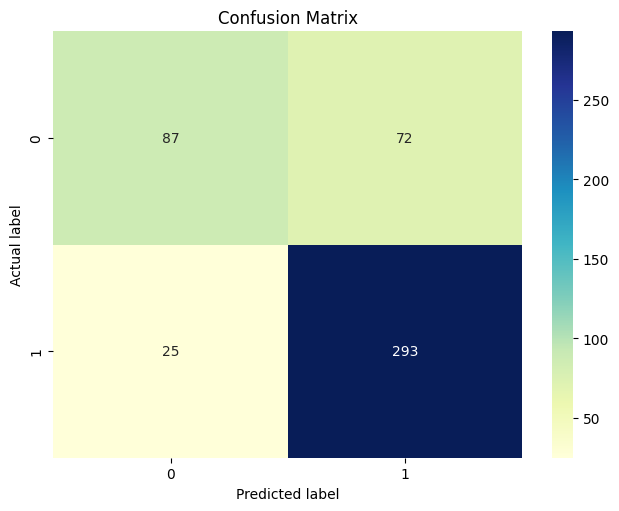

In [142]:
cnf_matix = confusion_matrix(ytest, gbdt_pred)
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matix), annot = True, cmap = 'YlGnBu',fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

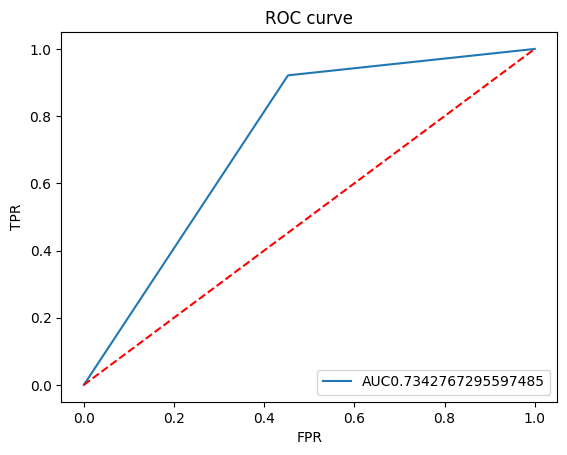

In [144]:
fpr, tpr, _ = roc_curve(ytest, gbdt_pred)
auc = roc_auc_score(ytest, rf_pred)
plt.plot(fpr, tpr, label = "AUC"+str(auc))
plt.plot([0,1],[0,1], 'r--')
plt.legend(loc = 4)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

From the above model which we created using Gradient Boosting we have got a very good scores. Also the ROC curve shows that this is a best model.

Accuracy:  0.7966457023060797

Recall:  0.9213836477987422

Precision:  0.8027397260273973

ROC AUC score:  0.7342767295597485

f1 score:  0.8579795021961933

## **Actionable Insights and Recommendations**



*   Drivers who have higher salary tend to resign lesser so the company can increase the base salary of the drivers which inturn increases the drivers satisfaction.
*   Drivers who had improvement in increment tends to stay longer compared to the drivers who didnt had. Hence providing annual hikes for drivers based on their ride performance would increase the retention of people.
*   Cities with less number of drivers needs to be taken care so that customer expereince is good and they continue to use OLA instead of going to other competitors.
*   Cities like C20 and C15 see the highest attrition among drivers, so some incentives can be given and joining OLA can be promoted here so as to retain the drivers and also maintaining the customer experience.
*   People with higher grades like 5 and 4 tends to resign less compared to that of 1 and 2. As higher the grades higher the pay so drivers are more satisfied with higher grades.
*   Drivers can be promoted to the next grades through performance metrics so that salaries are increased.
*   Driver ratings can be introduced as a metric so as to see if a driver is getting good ratings or not. If he is not getting good ratings, he can be reached out by professional who can motivate them to work more.
*   Company can identify the potentials churning drivers then provide them some financial assistance and try understanding their problem which is leading them to churn and try addressing those issues.
*   On an average male drivers are tend to churn more compared to female drivers. So efforts can be made check the problems faced by male drivers.
*   The female driver counts are less compared to male. More female drivers joining can be encouraged so that they we can reduce the churning slightly.
*   Despite of the age difference we can see drivers churning at all ages.
*   List item






